**PS_1**

**Prakash Kandel**

**Course:** 56:834:653:01 DATA VISUALIZATION

Spring 2023

**Instructor**: Adam Okulicz-Kozaryn

In [1]:
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
import string #for annotating pouints in scatter                                                                           
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                                                                                                            
from geopy.geocoders import Nominatim
import json
import numpy
import openpyxl
from pathlib import Path


Data Source:
<a href="https://hdr.undp.org/content/2022-global-multidimensional-poverty-index-mpi#/indicies/MPI"> 2022 Global Multidimensional Poverty Index (MPI)</a>

The dataset is about measurement of multidimensional poverty based on health, education, and standard of living in countries around the world. 

**What Is The Multidimensional Poverty Measure?**

nice!

An index that captures the percentage of households in a country deprived along three dimensions of well-being – monetary poverty, education, and basic infrastructure services – to provide a more complete picture of poverty. A means to capture the complexity of poverty that considers multiple dimensions of well-being beyond just monetary poverty.

(Source: Multidimensional Poverty Measure, World Bank)

In [2]:
dir(sys)

['__breakpointhook__',
 '__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '__unraisablehook__',
 '_base_executable',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_framework',
 '_getframe',
 '_git',
 '_home',
 '_xoptions',
 'abiflags',
 'addaudithook',
 'api_version',
 'argv',
 'audit',
 'base_exec_prefix',
 'base_prefix',
 'breakpointhook',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_asyncgen_hooks',
 'get_coroutine_origin_tracking_depth',
 'getallocatedblocks',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencodeerrors',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',


In [4]:
# Multi Dimensional Poverty Database 2022
urllib.request.urlretrieve("https://docs.google.com/uc?id=1rA6uE63JeuNfC5CVsoSWF2qFtiPfrO5z&export=download", "2022_Multi_Dimensional_Poverty_ Dataset.xlsx")

#df.head() # no it doesn't run; read the errors! again error!
#naming it df fine if you have 1, but better name it substantively say pov esp if many datasets

('2022_Multi_Dimensional_Poverty_ Dataset.xlsx',
 <http.client.HTTPMessage at 0x7f7ca0b710d0>)

In [5]:
df = pd.read_excel('/content/2022_Multi_Dimensional_Poverty_ Dataset.xlsx', 
                   sheet_name='Table 1',
                   header=3, 
                   usecols='A,C,E,G,I,K,M,O,Q,S,U,W,Y,AA,AC') # using only columns that have meaningful data
df.head() #ok now we're cooking with gas!

,Unnamed: 0,Year and survey,Unnamed: 4,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2020),Inequality among the poor,Population in severe multidimensional poverty,Unnamed: 18,Health,Education,Standard of living,National poverty line,PPP $1.90 a day
0,Country,2010-2021,Value,(%),(%),(thousands),(thousands),Value,(%),(%),(%),NaN,NaN,2009-2020,2009-2021
1,Estimates based on surveys for 2016–2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2015/2016 D,0.271721,55.910242,48.59955,19365.187015,21789.46795,0.020276,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,..
3,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.24155,20.17004,..,0.067062,5.04032,28.259981,55.054617,16.685401,21.8,0.0
4,Algeria,2018/2019 M,0.005409,1.380835,39.17263,589.690668,599.995812,0.006748,0.202808,3.607168,31.214354,49.301260,19.484380,5.5,0.4


In [ ]:
df= df.drop(labels=1, axis=0) #dropped the 'Observation 1' as it did not contaon relevant data 

df.head()


,Unnamed: 0,Year and survey,Unnamed: 4,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2020),Inequality among the poor,Population in severe multidimensional poverty,Unnamed: 18,Health,Education,Standard of living,National poverty line,PPP $1.90 a day
0,Country,2010-2021,Value,(%),(%),(thousands),(thousands),Value,(%),(%),(%),NaN,NaN,2009-2020,2009-2021
2,Afghanistan,2015/2016 D,0.271721,55.910242,48.59955,19365.187015,21789.46795,0.020276,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,..
3,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.24155,20.17004,..,0.067062,5.04032,28.259981,55.054617,16.685401,21.8,0.0
4,Algeria,2018/2019 M,0.005409,1.380835,39.17263,589.690668,599.995812,0.006748,0.202808,3.607168,31.214354,49.301260,19.484380,5.5,0.4
5,Angola,2015/2016 D,0.282435,51.10411,55.266601,14899.273606,17083.330417,0.023988,32.457551,15.542856,21.164586,32.050019,46.785396,32.3,49.9


In [ ]:
df.tail(50) #observing the last 50 rows in order to see which rows are not required as part of the cleaning

,Unnamed: 0,Year and survey,Unnamed: 4,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2020),Inequality among the poor,Population in severe multidimensional poverty,Unnamed: 18,Health,Education,Standard of living,National poverty line,PPP $1.90 a day
112,Ukraine,2012 M,0.00084,0.244237,34.410454,110.898957,107.243799,..,0.0,0.418627,60.483237,28.359218,11.157545,1.1,0.0
113,Yemen,2013 D,0.245166,48.466429,50.5848,13078.182111,15646.924162,0.021178,24.349764,22.285696,28.95319,30.414853,40.631957,48.6,18.3
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Developing countries,—,0.093641,19.12587,48.96036,1099360.782275,1162445.646194,0.017473,8.522536,14.94958,24.92427,31.321990,43.753740,20.51042,14.2275
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Arab States,—,0.073659,15.05762,48.91777,44118.55,51444.49,0.018626,6.84705,8.944124,26.09148,34.292790,39.615730,26.41973,4.989979
119,East Asia and the Pacific,—,0.022361,5.251243,42.58232,105152.9,108650.5,0.008744,0.995655,14.3791,27.91944,35.241580,36.838980,3.849685,0.860706
120,Europe and Central Asia,—,0.003791,0.998324,37.97467,1072.162,1108.611,0.003955,0.070491,3.214038,53.2499,24.573110,22.177000,10.86988,0.852991
121,Latin America and the Caribbean,—,0.026707,6.329474,42.19392,36054.4,37373.68,0.009773,1.557542,6.376182,39.768,24.909070,35.322930,40.75642,4.014825


In [6]:
df.drop(df.index[113:161], inplace=True) # dropped rows that did not contain data but notes
 
df.tail() # to ensure the lowest portion contains the nam eof countries only

,Unnamed: 0,Year and survey,Unnamed: 4,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2020),Inequality among the poor,Population in severe multidimensional poverty,Unnamed: 18,Health,Education,Standard of living,National poverty line,PPP $1.90 a day
109,South Sudan,2010 M,0.580157,91.862887,63.154715,8923.945762,9743.186339,0.023142,74.343175,6.336535,13.987631,39.562219,46.450150,82.3,76.5
110,Sudan,2014 M,0.27944,52.328044,53.4015,19363.074392,23254.837148,0.02348,30.878279,17.660528,21.060756,29.151100,49.788141,46.5,12.2
111,Trinidad and Tobago,2011 M,0.002418,0.636561,37.984198,9.039289,9.663927,..,0.099323,3.681444,45.490643,34.025756,20.483601,..,..
112,Ukraine,2012 M,0.00084,0.244237,34.410454,110.898957,107.243799,..,0.0,0.418627,60.483237,28.359218,11.157545,1.1,0.0
161,Columns 13 and 14: World Bank. 2022. World Dev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(df) # list of variables for renaming purpose

['Unnamed: 0',
 'Year and survey',
 'Unnamed: 4',
 'Headcount',
 'Intensity of deprivation',
 'Number of poor (year of the survey)',
 'Number of poor (2020)',
 'Inequality among the poor',
 'Population in severe multidimensional poverty ',
 'Unnamed: 18',
 'Health',
 'Education',
 'Standard of living',
 'National poverty line',
 'PPP $1.90 a day']

In [ ]:
# renaming the columns

df.rename(columns = {'Unnamed: 0':'country', 
                     'Year and survey': 'Year and survey (2010-21)',
                     'Unnamed: 4' : 'Value of MPI', 
                     'Headcount': 'Headcount (%)',
                     'Intensity of deprivation' : 'Intensity of deprivation (%)', 
                     'Number of poor (year of the survey)' : 'Number of poor in 000s(year of the survey)',
                     'Number of poor (2020)' : 'Number of poor in 000s (2020)',
                     'Inequality among the poor' : 'Inequality among the poor (%)',
                     'Population in severe multidimensional poverty': 'Population in severe multidimensional poverty(%)',
                     'Unnamed: 18': 'Population vulnerable to multidimensional poverty (%)',
                     'Health':'Contribution of Health in MPI (%)',
                     'Education': 'Contribution of Education in MPI (%)',
                     'Standard of living': 'Contribution of Standard of Living in MPI (%)',
                     'National poverty line': 'National poverty line(2009-2021)',
                     'PPP $1.90 a day': 'PPP $1.90 a day (2009-2021)'}, inplace = True)

# Here 'MPI' referes to Multidimensional Poverty Index'.


In [ ]:
df = df.drop(labels=0, axis=0) # removed the 'Observation Row 0" as it did not have meaningful data
df #ok that's technically correct, butr can also drop on condition eg drop if country="Country"

,country,Year and survey (2010-21),Value of MPI,Headcount (%),Intensity of deprivation (%),Number of poor in 000s(year of the survey),Number of poor in 000s (2020),Inequality among the poor (%),Population in severe multidimensional poverty,Population vulnerable to multidimensional poverty (%),Contribution of Health in MPI (%),Contribution of Education in MPI (%),Contribution of Standard of Living in MPI (%),National poverty line(2009-2021),PPP $1.90 a day (2009-2021)
2,Afghanistan,2015/2016 D,0.271721,55.910242,48.59955,19365.187015,21789.46795,0.020276,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,..
3,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.24155,20.17004,..,0.067062,5.04032,28.259981,55.054617,16.685401,21.8,0.0
4,Algeria,2018/2019 M,0.005409,1.380835,39.17263,589.690668,599.995812,0.006748,0.202808,3.607168,31.214354,49.301260,19.484380,5.5,0.4
5,Angola,2015/2016 D,0.282435,51.10411,55.266601,14899.273606,17083.330417,0.023988,32.457551,15.542856,21.164586,32.050019,46.785396,32.3,49.9
6,Argentina,2019/2020 M,0.001469,0.432323,33.98602,194.70126,194.70126,..,0.005121,1.647459,69.67954,21.381985,8.938479,42.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,South Sudan,2010 M,0.580157,91.862887,63.154715,8923.945762,9743.186339,0.023142,74.343175,6.336535,13.987631,39.562219,46.450150,82.3,76.5
110,Sudan,2014 M,0.27944,52.328044,53.4015,19363.074392,23254.837148,0.02348,30.878279,17.660528,21.060756,29.151100,49.788141,46.5,12.2
111,Trinidad and Tobago,2011 M,0.002418,0.636561,37.984198,9.039289,9.663927,..,0.099323,3.681444,45.490643,34.025756,20.483601,..,..
112,Ukraine,2012 M,0.00084,0.244237,34.410454,110.898957,107.243799,..,0.0,0.418627,60.483237,28.359218,11.157545,1.1,0.0


In [ ]:
df['country'].describe() #Descriptive Statistics for the country variable
#dont say "Descriptive Statistics for the country variable"--its obvious; say what you are finding
#and this one doesnt make sense, so interpretation helps with that too
#ie dropping things that dont make sense

count             112
unique            112
top       Afghanistan
freq                1
Name: country, dtype: object

In [ ]:
df['Headcount (%)'].describe() #Descriptive Statistics for the Headcount Ration

count     112
unique    112
top       (%)
freq        1
Name: Headcount (%), dtype: object

In [ ]:
df['Contribution of Standard of Living in MPI (%)'].describe() ##Descriptive Statistics for the "Contribution of Standard of Living in MPI (%)" variable

count    111.000000
mean      37.471669
std       16.192236
min        1.058382
25%       26.333341
50%       41.112393
75%       49.818836
max       65.336499
Name: Contribution of Standard of Living in MPI (%), dtype: float64

On average "Standard of Living" contibuted to 37% deprivation to overall multidimensional poverty across the selected countries.

In [ ]:
df['Contribution of Education in MPI (%)'].describe() ##Descriptive Statistics for the "Contribution of Education in MPI (%)" variable

#Contribution of Education in MPI (%)

count    111.000000
mean      31.383064
std       11.881821
min        0.660957
25%       23.456622
50%       31.491717
75%       39.614716
max       61.568220
Name: Contribution of Education in MPI (%), dtype: float64

On average "Education" contibuted to 31% deprivation to overall multidimensional poverty across the selected countries.

In [ ]:
df['Contribution of Education in MPI (%)'].quantile(q=0.50)

31.491717

The median value for 'Contribution of Education in MPI (%)' is 31.5% .

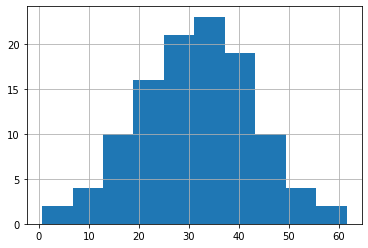

In [ ]:
df["Contribution of Education in MPI (%)"].hist()  

The highest contribution od education in multidimensional deprivation is between 30% to 40% among the countries around the world.

interept better, not sure i understand; like im not sure what this variable means, i guess like perc of the pov index that is due to educ; and no 30-40 is not the highest! the highest is like 60, 30-40 is most typical, many countire sare in that range; can also look at outliers, eg which places are close to 0 and which are around 60